In [55]:
#AQI= Air Quality Index, range = 0-500|AQI<50 -> good air quality|AQI>300 -> hazardous air quality|
import pandas as pd
import numpy as np
pdf=pd.read_csv('pollution_us_2000_2016.csv')
pdf
pdf=pdf.drop(columns=['Unnamed: 0'])

In [61]:
pdf=pdf[pdf['State']!='Country Of Mexico']
pdf

<ipython-input-61-0fd72b676c2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['count']=1


,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,count
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,3.000000,9.0,21,13.0,Parts per million,1.145833,4.200,21,NaN,1
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,3.000000,9.0,21,13.0,Parts per million,0.878947,2.200,23,25.0,1
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,2.975000,6.6,23,NaN,Parts per million,1.145833,4.200,21,NaN,1
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,2.975000,6.6,23,NaN,Parts per million,0.878947,2.200,23,25.0,1
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,1.958333,3.0,22,4.0,Parts per million,0.850000,1.600,23,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,1.083333,...,0.000000,0.0,2,NaN,Parts per million,0.091667,0.100,2,1.0,1
1746657,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.939130,...,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,NaN,1
1746658,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.939130,...,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0,1
1746659,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.939130,...,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN,1


In [62]:
#determine number of sites not in a city
#pdf=pdf.drop(columns=['Unnamed: 0'])
pdf_no_city=pdf.loc[(pdf['City']=='Not in a city')]
pdf_no_city.groupby(['City']).count()['count']
#determine rate of each pollutant outside of cities
pdf_no_city=pdf_no_city.groupby(['City']).mean()
print('Mean AQI of major pollutants in non-urban regions')
print(pdf_no_city[['NO2 AQI','O3 AQI','SO2 AQI','CO AQI']])
pdf_city=pdf.loc[(pdf['City']!='Not in a city')]
pdf_city=pdf_city.groupby(['City']).mean()
pdf_city=pdf_city[['NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
pdf_city['Region']='urban'
pdf_city=pdf_city.groupby(['Region']).mean()
print('Mean AQI of major pollutants in urban regions')
print(pdf_city)

Mean AQI of major pollutants in non-urban regions
                 NO2 AQI     O3 AQI   SO2 AQI    CO AQI
City                                                   
Not in a city  12.955148  34.980919  3.563751  3.770168
Mean AQI of major pollutants in urban regions
          NO2 AQI     O3 AQI   SO2 AQI    CO AQI
Region                                          
urban   23.356404  36.937136  8.688706  5.455603


In [66]:
pdf_states=pdf.groupby(['State']).mean()
print('States with highest NO2 AQI')
pdf_states.sort_values('NO2 AQI',ascending=False).head(5)
#top 5 states with highest NO2 AQI over range 2000-2016 (Arizona, Colorado, Michigan, New Jersey, DC)
print('States with lowest NO2 AQI')
#top 5 states with lowest NO2 AQI over range 2000-2016 (Tennessee, South Carolina, Hawaii, Wyoming, South Dakota)
pdf_states.sort_values('NO2 AQI',ascending=True).head(5)
print('States with highest O3 AQI')
pdf_states.sort_values('O3 AQI',ascending=False).head(5)
#top 5 states with highest O3 AQI over range 2000-2016 (Tennessee, North Carolina, Kentucky, Utah, Missouri)
pdf_states.sort_values('O3 AQI',ascending=True).head(5)
#top 5 states with lowest O3 AQI over range 2000-2016 (Alaska, Oregon, Massachusetts, Hawaii, Wisconsin)


States with highest NO2 AQI
States with lowest NO2 AQI
States with highest O3 AQI


,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,count
State,,,,,,,,,,,,,,,,,,,,
Alaska,2.0,90.0,34.0,11.313152,21.046910,12.218845,19.553191,0.012799,0.019116,10.341439,17.725431,6.083755,9.659372,9.983789,14.487335,0.423438,0.677599,10.138804,6.528340,1.0
Oregon,41.0,51.0,80.0,9.650599,18.546617,12.245888,17.246736,0.019261,0.028924,10.392742,25.167882,0.978803,1.729540,10.355096,2.035266,0.305456,0.547753,9.466000,5.323724,1.0
Massachusetts,25.0,25.0,42.0,18.646619,31.475524,12.405711,29.778324,0.020667,0.029743,10.235120,25.913035,2.561435,5.213494,10.617560,8.007972,0.318438,0.526043,10.228166,5.539959,1.0
Hawaii,15.0,3.0,10.0,3.164697,9.264549,9.601697,8.659893,0.025159,0.030411,9.284080,26.674689,0.985950,1.782215,11.177155,2.284646,0.367477,0.426746,4.415368,4.483133,1.0
Wisconsin,55.0,79.0,26.0,14.968732,27.730871,12.377309,26.166227,0.022432,0.031734,10.350923,27.321900,2.614880,4.991161,6.600264,8.279683,0.350427,0.559103,6.266491,5.248021,1.0


In [132]:
pdf_dates=pdf.groupby(['Date Local']).mean()
pdf_dates['Year']=2000
total_num=pdf_dates['Site Num'].count()
#pdf_dates.index[1]
#pdf_dates.iloc[0,1]=63.8
pdf_dates
for x in range (0,total_num-1):
    if ("2001" in pdf_dates.index[x]):
        pdf_dates.iloc[x,20]='2001'
    elif ("2002" in pdf_dates.index[x]):
        pdf_dates.iloc[x,20]='2002'
    elif ("2003" in pdf_dates.index[x]):
        pdf_dates.iloc[x,20]='2003'
    elif ("2004" in pdf_dates.index[x]):
        pdf_dates.iloc[x,20]='2004'
    elif ("2005" in pdf_dates.index[x]):
        pdf_dates.iloc[x,20]='2005'
    elif ("2006" in pdf_dates.index[x]):
        pdf_dates.iloc[x,20]='2006'
    elif ("2007" in pdf_dates.index[x]):
        pdf_dates.iloc[x,20]='2007'
    elif ("2008" in pdf_dates.index[x]):
        pdf_dates.iloc[x,20]='2008'
    elif ("2009" in pdf_dates.index[x]):
        pdf_dates.iloc[x,20]='2009'
    elif ("2010" in pdf_dates.index[x]):
        pdf_dates.iloc[x,20]='2010'
    elif ("2011" in pdf_dates.index[x]):
        pdf_dates.iloc[x,20]='2011'
    elif ("2012" in pdf_dates.index[x]):
        pdf_dates.iloc[x,20]='2012'
    elif ("2013" in pdf_dates.index[x]):
        pdf_dates.iloc[x,20]='2013'
    elif ("2014" in pdf_dates.index[x]):
        pdf_dates.iloc[x,20]='2014'
    elif ("2015" in pdf_dates.index[x]):
        pdf_dates.iloc[x,20]='2015'
    elif ("2016" in pdf_dates.index[x]):
        pdf_dates.iloc[x,20]='2016'       

In [134]:
pdf_years=pdf_dates.groupby(['Year']).mean()
print('Years with highest NO2 AQI')
pdf_years.sort_values('NO2 AQI',ascending=False)

Years with highest NO2 AQI


,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,count
Year,,,,,,,,,,,,,,,,,,,,
2000,20.674357,78.115565,1315.434078,18.236233,33.748884,12.395383,31.766192,0.022997,0.037021,10.086204,33.738631,3.647533,8.540830,10.241052,13.944365,0.602532,1.103742,8.983929,10.492938,1.0
2001,19.421797,71.967418,1301.564172,18.121734,33.503600,12.305734,31.727132,0.024183,0.038670,10.116562,35.564574,3.118774,7.723745,9.785536,12.580327,0.540314,0.998648,8.673749,9.446664,1.0
2002,19.466600,66.394992,1147.727010,17.162111,31.782211,12.222305,30.086453,0.025311,0.039652,10.161050,37.105592,2.753834,6.657292,9.534678,10.863346,0.535551,0.960369,8.546729,9.195886,1.0
2003,19.933324,70.041585,1169.344057,16.428720,30.528485,12.283126,28.884956,0.024271,0.038106,10.153565,34.780594,2.864473,6.858516,9.727629,11.145734,0.516939,0.907511,8.492262,8.789127,1.0
2005,19.233046,69.639054,1337.408087,15.477064,29.390749,12.138697,27.789702,0.024602,0.038634,10.139024,35.131203,2.884626,6.763582,9.533451,10.934355,0.435794,0.757876,8.204255,7.300853,1.0
2004,20.103561,72.670340,1275.405130,15.608499,29.210188,12.204346,27.628222,0.023854,0.037250,10.083997,33.155428,2.862618,6.804947,9.641477,11.092752,0.469467,0.815614,8.524592,7.897454,1.0
2006,22.314491,70.340747,1261.715437,14.834703,28.658974,11.897411,27.090911,0.025053,0.038617,10.248940,34.768734,2.637093,6.144690,9.628312,10.025309,0.414545,0.714872,8.013740,6.906540,1.0
2007,22.169587,70.677558,1245.550388,13.737424,26.904209,11.637492,25.424151,0.025454,0.038826,10.178995,34.924142,2.369678,5.563984,9.470747,9.016529,0.383115,0.633376,7.810303,6.200131,1.0
2008,22.408907,69.111127,1254.856773,12.511448,25.112508,11.580442,23.720618,0.025446,0.038398,10.183623,34.306529,1.903269,4.525598,9.145084,7.302777,0.333942,0.552632,7.663888,5.378235,1.0


In [135]:
print('Years with highest O3 AQI')
pdf_dates.sort_values('O3 AQI',ascending=False)

Years with highest O3 AQI


,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,count,Year
Date Local,,,,,,,,,,,,,,,,,,,,,
2002-08-11,23.178082,72.575342,1083.109589,12.806800,28.273973,12.561644,26.849315,0.046691,0.072301,10.684932,...,3.831030,11.568493,11.273973,18.356164,0.388682,0.584247,5.684932,5.972603,1.0,2002
2002-08-10,23.432432,72.959459,1068.527027,16.922763,36.527027,8.486486,34.689189,0.045304,0.072865,10.472973,...,3.639636,10.905405,8.898649,18.121622,0.467794,0.760135,6.466216,7.594595,1.0,2002
2002-07-09,25.772727,71.647727,922.840909,16.986027,36.159091,8.113636,34.329545,0.041856,0.067136,10.250000,...,4.141480,10.827273,9.312500,17.579545,0.420015,0.635227,5.920455,6.431818,1.0,2002
2002-07-08,24.585366,71.597561,977.402439,16.973582,34.743902,12.573171,32.963415,0.043886,0.071085,10.487805,...,4.075652,12.643902,12.018293,21.817073,0.478542,0.776829,6.987805,7.670732,1.0,2002
2003-06-25,23.684932,73.123288,1197.767123,18.085775,37.657534,11.547945,35.794521,0.042060,0.070397,9.863014,...,4.096932,9.851370,10.191781,16.342466,0.446780,0.769863,6.424658,7.356164,1.0,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-12-07,16.355556,64.911111,1331.955556,26.265604,43.088889,11.933333,40.955556,0.007866,0.014511,9.933333,...,5.477141,10.295556,9.611111,17.177778,1.023135,1.893333,10.344444,18.911111,1.0,2000
2000-12-08,16.355556,64.911111,1331.955556,24.443612,36.622222,14.466667,34.822222,0.007898,0.014267,10.533333,...,5.156703,9.294444,9.755556,15.088889,0.846386,1.592222,10.500000,15.466667,1.0,2000
2002-01-08,13.552083,60.208333,1106.739583,26.100342,45.302083,12.729167,42.125000,0.007941,0.014302,8.479167,...,3.511307,7.666667,11.489583,12.697917,0.986378,1.852083,9.739583,18.040816,1.0,2002


In [136]:
print('Years with highest CO AQI')
pdf_dates.sort_values('CO AQI',ascending=False)

Years with highest CO AQI


,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,count,Year
Date Local,,,,,,,,,,,,,,,,,,,,,
2000-12-21,16.355556,64.288889,1332.200000,32.432851,51.688889,11.133333,47.222222,0.008655,0.015600,9.333333,...,5.846804,10.626667,10.288889,16.755556,1.362522,2.527778,9.377778,24.933333,1.0,2000
2000-12-05,16.355556,64.911111,1331.955556,30.753891,50.488889,13.444444,48.577778,0.010086,0.017978,9.977778,...,6.203169,14.710000,12.066667,23.488889,1.180564,2.445556,10.288889,24.866667,1.0,2000
2000-12-20,16.355556,64.288889,1332.200000,29.354747,43.955556,15.000000,42.044444,0.008948,0.016556,8.177778,...,6.323879,12.157778,10.466667,18.755556,1.258519,2.460000,9.444444,24.577778,1.0,2000
2000-12-04,16.355556,64.911111,1331.955556,31.073677,48.622222,15.488889,46.800000,0.008469,0.015511,9.311111,...,5.592650,11.027778,11.766667,17.466667,1.264894,2.554444,11.544444,24.000000,1.0,2000
2001-01-05,14.298851,67.988506,1446.287356,35.647809,52.390805,13.528736,50.287356,0.007980,0.014920,7.724138,...,5.790839,12.171264,12.252874,19.413793,1.355940,2.506897,11.333333,23.431818,1.0,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-10,19.571429,118.428571,26.142857,5.420833,11.728571,7.285714,10.857143,0.032095,0.046429,10.428571,...,0.242828,0.900000,8.928571,1.000000,0.213757,0.257857,5.928571,2.285714,1.0,2016
2016-05-04,19.571429,118.428571,26.142857,4.629475,11.042857,6.857143,10.285714,0.034113,0.045143,11.428571,...,0.021089,0.121429,7.857143,0.000000,0.195060,0.245857,6.785714,2.285714,1.0,2016
2016-05-27,19.571429,118.428571,26.142857,4.103193,8.600000,10.714286,7.857143,0.033988,0.040857,10.714286,...,0.108749,0.278571,2.428571,0.142857,0.193961,0.235357,8.071429,2.142857,1.0,2016


In [137]:
print('Years with highest SO2 AQI')
pdf_dates.sort_values('SO2 AQI',ascending=False)

Years with highest SO2 AQI


,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,count,Year
Date Local,,,,,,,,,,,,,,,,,,,,,
2000-09-18,24.233766,87.000000,1198.987013,23.157168,41.662338,13.402597,39.558442,0.024735,0.045234,10.519481,...,6.161033,16.224675,11.545455,25.415584,0.562231,1.092208,7.181818,10.038961,1.0,2000
2000-10-20,22.630137,84.753425,1235.109589,25.403491,46.136986,13.082192,43.589041,0.019758,0.036452,10.520548,...,5.916364,14.847260,11.684932,24.178082,0.768217,1.443836,9.595890,13.095890,1.0,2000
2002-06-10,23.975000,48.456250,590.818750,16.920818,34.393750,14.925000,32.600000,0.029771,0.042981,15.093750,...,4.090321,12.211563,8.271875,23.618750,0.557207,1.029062,6.475000,18.481250,1.0,2002
2000-10-13,22.946667,85.133333,1216.066667,25.612101,44.146667,13.333333,41.880000,0.019580,0.037507,10.320000,...,6.952245,15.214000,10.660000,23.506667,0.751114,1.524667,9.840000,13.600000,1.0,2000
2000-12-05,16.355556,64.911111,1331.955556,30.753891,50.488889,13.444444,48.577778,0.010086,0.017978,9.977778,...,6.203169,14.710000,12.066667,23.488889,1.180564,2.445556,10.288889,24.866667,1.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-21,19.571429,118.428571,26.142857,6.476353,20.300000,10.285714,18.714286,0.039941,0.054857,10.000000,...,0.059218,0.228571,10.571429,0.000000,0.238401,0.397857,10.642857,4.000000,1.0,2016
2016-05-04,19.571429,118.428571,26.142857,4.629475,11.042857,6.857143,10.285714,0.034113,0.045143,11.428571,...,0.021089,0.121429,7.857143,0.000000,0.195060,0.245857,6.785714,2.285714,1.0,2016
2016-05-14,19.571429,118.428571,26.142857,3.588366,10.871429,13.000000,10.142857,0.034571,0.045571,10.285714,...,0.051847,0.150000,4.571429,0.000000,0.181231,0.264286,10.000000,2.571429,1.0,2016


In [125]:
#Highest record of NO2 AQI in the US from 2000-2016
pdf['NO2 AQI'].idxmax()
pdf.iloc[1432]

State Code                                           4
County Code                                         13
Site Num                                          3003
Address              2857 N MILLER RD-S SCOTTSDALE STN
State                                          Arizona
County                                        Maricopa
City                                        Scottsdale
Date Local                                  2000-01-10
NO2 Units                            Parts per billion
NO2 Mean                                       135.188
NO2 1st Max Value                                  267
NO2 1st Max Hour                                    20
NO2 AQI                                            132
O3 Units                             Parts per million
O3 Mean                                       0.017958
O3 1st Max Value                                  0.04
O3 1st Max Hour                                     10
O3 AQI                                              34
SO2 Units 

In [127]:
pdf['SO2 AQI'].idxmax()
pdf.iloc[229463]

State Code                          17
County Code                        163
Site Num                            10
Address                   13TH & TUDOR
State                         Illinois
County                     Saint Clair
City                  East Saint Louis
Date Local                  2002-02-14
NO2 Units            Parts per billion
NO2 Mean                       16.2273
NO2 1st Max Value                   28
NO2 1st Max Hour                     0
NO2 AQI                             26
O3 Units             Parts per million
O3 Mean                        0.02175
O3 1st Max Value                 0.031
O3 1st Max Hour                     10
O3 AQI                              26
SO2 Units            Parts per billion
SO2 Mean                       32.7917
SO2 1st Max Value                  327
SO2 1st Max Hour                     4
SO2 AQI                            200
CO Units             Parts per million
CO Mean                       0.579167
CO 1st Max Value         

In [129]:
pdf['CO AQI'].idxmax()
pdf.iloc[10505]

State Code                                             6
County Code                                           25
Site Num                                               5
Address              1029 ETHEL ST, CALEXICO HIGH SCHOOL
State                                         California
County                                          Imperial
City                                            Calexico
Date Local                                    2000-12-20
NO2 Units                              Parts per billion
NO2 Mean                                         49.7391
NO2 1st Max Value                                     92
NO2 1st Max Hour                                       0
NO2 AQI                                               91
O3 Units                               Parts per million
O3 Mean                                         0.013417
O3 1st Max Value                                   0.029
O3 1st Max Hour                                        8
O3 AQI                         

In [131]:
pdf['O3 AQI'].idxmax()
pdf.iloc[1364788]

State Code                           6
County Code                         95
Site Num                             4
Address               304 TUOLUMNE ST.
State                       California
County                          Solano
City                           Vallejo
Date Local                  2013-02-21
NO2 Units            Parts per billion
NO2 Mean                         15.78
NO2 1st Max Value                 32.3
NO2 1st Max Hour                    22
NO2 AQI                             30
O3 Units             Parts per million
O3 Mean                       0.012417
O3 1st Max Value                  0.03
O3 1st Max Hour                     13
O3 AQI                              28
SO2 Units            Parts per billion
SO2 Mean                           0.6
SO2 1st Max Value                  0.8
SO2 1st Max Hour                    20
SO2 AQI                            NaN
CO Units             Parts per million
CO Mean                       0.513333
CO 1st Max Value         

In [139]:
import matplotlib.pyplot as plt
pdf_dates

,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,count,Year
Date Local,,,,,,,,,,,,,,,,,,,,,
2000-01-01,16.102564,63.820513,1446.230769,18.508666,33.923077,10.769231,32.307692,0.018138,0.028231,12.025641,...,4.317923,8.302564,9.461538,13.384615,0.792037,1.675641,8.730769,16.000000,1.0,2000
2000-01-02,16.368421,63.736842,1484.236842,14.692258,28.736842,12.052632,27.184211,0.020553,0.031737,9.263158,...,3.419270,7.231579,8.578947,11.315789,0.578626,1.144737,8.855263,11.342105,1.0,2000
2000-01-03,16.285714,65.233766,1464.870130,23.754976,40.636364,14.753247,37.233766,0.012814,0.022455,13.000000,...,3.280580,6.970130,11.668831,11.454545,0.931910,1.857143,12.753247,16.131579,1.0,2000
2000-01-04,15.850000,64.300000,1460.350000,24.160910,41.700000,12.975000,38.650000,0.013022,0.021475,9.950000,...,2.760379,6.296250,13.237500,10.125000,0.992513,1.868750,9.600000,18.050000,1.0,2000
2000-01-05,15.850000,64.300000,1460.350000,23.804671,42.450000,13.650000,38.700000,0.015492,0.025675,10.000000,...,3.002096,6.908750,11.062500,11.375000,0.999075,1.960000,10.412500,17.775000,1.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27,19.571429,118.428571,26.142857,4.103193,8.600000,10.714286,7.857143,0.033988,0.040857,10.714286,...,0.108749,0.278571,2.428571,0.142857,0.193961,0.235357,8.071429,2.142857,1.0,2016
2016-05-28,19.571429,118.428571,26.142857,4.039124,11.200000,15.285714,9.857143,0.037048,0.047286,11.857143,...,0.167123,0.521429,11.785714,0.428571,0.199472,0.281929,9.428571,2.571429,1.0,2016
2016-05-29,19.571429,118.428571,26.142857,5.542965,21.485714,18.000000,20.000000,0.032696,0.045571,8.428571,...,0.330121,2.442857,8.000000,3.857143,0.211158,0.414643,13.714286,3.571429,1.0,2016


In [144]:
pdf_dates['Dates Local']=pdf_dates.index
pdf_dates

,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,count,Year,Dates Local
Date Local,,,,,,,,,,,,,,,,,,,,,
2000-01-01,16.102564,63.820513,1446.230769,18.508666,33.923077,10.769231,32.307692,0.018138,0.028231,12.025641,...,8.302564,9.461538,13.384615,0.792037,1.675641,8.730769,16.000000,1.0,2000,2000-01-01
2000-01-02,16.368421,63.736842,1484.236842,14.692258,28.736842,12.052632,27.184211,0.020553,0.031737,9.263158,...,7.231579,8.578947,11.315789,0.578626,1.144737,8.855263,11.342105,1.0,2000,2000-01-02
2000-01-03,16.285714,65.233766,1464.870130,23.754976,40.636364,14.753247,37.233766,0.012814,0.022455,13.000000,...,6.970130,11.668831,11.454545,0.931910,1.857143,12.753247,16.131579,1.0,2000,2000-01-03
2000-01-04,15.850000,64.300000,1460.350000,24.160910,41.700000,12.975000,38.650000,0.013022,0.021475,9.950000,...,6.296250,13.237500,10.125000,0.992513,1.868750,9.600000,18.050000,1.0,2000,2000-01-04
2000-01-05,15.850000,64.300000,1460.350000,23.804671,42.450000,13.650000,38.700000,0.015492,0.025675,10.000000,...,6.908750,11.062500,11.375000,0.999075,1.960000,10.412500,17.775000,1.0,2000,2000-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27,19.571429,118.428571,26.142857,4.103193,8.600000,10.714286,7.857143,0.033988,0.040857,10.714286,...,0.278571,2.428571,0.142857,0.193961,0.235357,8.071429,2.142857,1.0,2016,2016-05-27
2016-05-28,19.571429,118.428571,26.142857,4.039124,11.200000,15.285714,9.857143,0.037048,0.047286,11.857143,...,0.521429,11.785714,0.428571,0.199472,0.281929,9.428571,2.571429,1.0,2016,2016-05-28
2016-05-29,19.571429,118.428571,26.142857,5.542965,21.485714,18.000000,20.000000,0.032696,0.045571,8.428571,...,2.442857,8.000000,3.857143,0.211158,0.414643,13.714286,3.571429,1.0,2016,2016-05-29


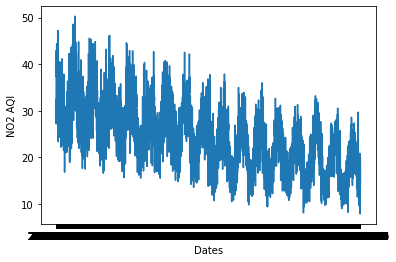

In [146]:
dates=pdf_dates['Dates Local']
NO2AQI=pdf_dates['NO2 AQI']
plt.plot(dates, NO2AQI)
plt.xlabel('Dates')
plt.ylabel('NO2 AQI')
plt.show()
#The graph indicates a decreasing trend in the NO2 AQI levels in the US over the span (2000-2016)

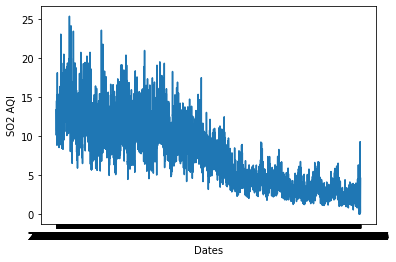

In [148]:
SO2AQI=pdf_dates['SO2 AQI']
plt.plot(dates, SO2AQI)
plt.xlabel('Dates')
plt.ylabel('SO2 AQI')
plt.show()

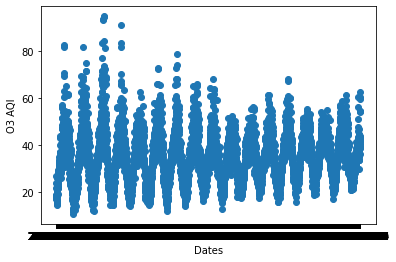

In [149]:
SO2AQI=pdf_dates['O3 AQI']
plt.scatter(dates, SO2AQI)
plt.xlabel('Dates')
plt.ylabel('O3 AQI')
plt.show()

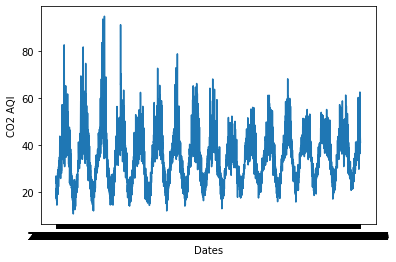

In [152]:
COAQI=pdf_dates['CO AQI']
plt.plot(dates, SO2AQI)
plt.xlabel('Dates')
plt.ylabel('CO2 AQI')
plt.show()